In [177]:
# 9/29/2022

# Leaf Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
from scipy import stats
from collections import Counter
from sklearn.metrics import f1_score
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
data = pd.read_csv('data/leaf_go_matrix.csv').set_index('Gene')

In [4]:
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)

In [5]:
data

,RNA.0,RNA.1,RNA.2,RNA.3,RNA.4,RNA.5,RNA.6,RNA.7,RNA.8,RNA.9,...,GO:0071456,GO:0071555,GO:0071704,GO:0090305,GO:0090502,GO:0098869,GO:0099503,GO:0106310,GO:0110165,GO:1902600
Gene,,,,,,,,,,,,,,,,,,,,,
AT1G01010,0.015788,0.006686,0.018992,0.031516,0.018477,0.038590,0.017716,0.016076,0.013351,0.010871,...,0,0,0,0,0,0,0,0,0,0
AT1G01020,0.202686,0.160506,0.164823,0.291442,0.172458,0.214948,0.167127,0.166249,0.202347,0.161328,...,0,0,0,0,0,0,0,0,0,0
AT1G01030,0.096341,0.045171,0.077251,0.122069,0.007859,0.021676,0.008652,0.039438,0.075727,0.099411,...,0,0,0,0,0,0,0,0,0,0
AT1G01040,0.087867,0.036287,0.089462,0.137137,0.106370,0.164065,0.067221,0.034331,0.115793,0.071442,...,0,0,0,1,1,0,0,0,0,0
AT1G01050,1.066829,1.021526,0.939546,0.801056,2.079121,2.451122,1.709261,1.306202,1.095262,0.845942,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350,0.001392,0.000000,0.002672,0.005861,0.001374,0.001383,0.000406,0.000000,0.004863,0.003193,...,0,0,0,0,0,0,0,0,0,0
ATMG01360,0.818947,0.119990,0.965947,1.155877,1.490377,1.331711,1.013871,0.078813,0.932920,0.925209,...,0,0,0,0,0,0,0,0,0,0
ATMG01370,0.012687,0.007197,0.029760,0.030679,0.025075,0.045068,0.019416,0.005692,0.019758,0.042390,...,0,0,0,0,0,0,0,0,0,0


In [6]:
coulmns_to_normalize=data.columns[0:32]
coulmns_to_normalize

Index(['RNA.0', 'RNA.1', 'RNA.2', 'RNA.3', 'RNA.4', 'RNA.5', 'RNA.6', 'RNA.7',
       'RNA.8', 'RNA.9', 'RNA.10', 'RNA.11', 'RNA.12', 'RNA.13', 'RNA.14',
       'RNA.15', 'RNA.16', 'RNA.17', 'RNA.18', 'RNA.19', 'RNA.20', 'RNA.21',
       'RNA.22', 'RNA.23', 'RNA.24', 'RNA.25', 'RNA.26', 'RNA.27', 'RNA.28',
       'RNA.29', 'RNA.30', 'RNA.31'],
      dtype='object')

In [7]:
data.describe()

,RNA.0,RNA.1,RNA.2,RNA.3,RNA.4,RNA.5,RNA.6,RNA.7,RNA.8,RNA.9,...,GO:0071456,GO:0071555,GO:0071704,GO:0090305,GO:0090502,GO:0098869,GO:0099503,GO:0106310,GO:0110165,GO:1902600
count,23112.000000,23112.000000,23112.000000,23112.000000,23112.000000,23112.000000,23112.000000,23112.000000,23112.000000,23112.000000,...,23112.000000,23112.000000,23112.000000,23112.000000,23112.000000,23112.000000,23112.000000,23112.000000,23112.000000,23112.000000
mean,0.432676,0.432676,0.432676,0.432676,0.432676,0.432676,0.432676,0.432676,0.432676,0.432676,...,0.009952,0.014884,0.004154,0.008740,0.003678,0.006014,0.007182,0.025787,0.011033,0.004543
std,2.801431,5.556852,2.371756,1.761083,2.876445,1.753436,2.641932,5.074034,2.188449,2.647804,...,0.099262,0.121091,0.064317,0.093081,0.060534,0.077319,0.084446,0.158504,0.104460,0.067251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003158,0.000820,0.005253,0.006454,0.006617,0.009353,0.005475,0.001197,0.004502,0.004761,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.054452,0.023651,0.064801,0.085930,0.074557,0.094886,0.063257,0.024192,0.065044,0.059784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.197544,0.111088,0.214977,0.279049,0.246364,0.295413,0.224565,0.115878,0.238186,0.210491,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,198.379900,464.896600,161.976100,77.054100,196.451700,108.536000,199.544200,456.792800,141.724700,211.722100,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data[coulmns_to_normalize] = data[coulmns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [9]:
print("Scaled Dataset Using Pandas")
data

Scaled Dataset Using Pandas


,RNA.0,RNA.1,RNA.2,RNA.3,RNA.4,RNA.5,RNA.6,RNA.7,RNA.8,RNA.9,...,GO:0071456,GO:0071555,GO:0071704,GO:0090305,GO:0090502,GO:0098869,GO:0099503,GO:0106310,GO:0110165,GO:1902600
Gene,,,,,,,,,,,,,,,,,,,,,
AT1G01010,0.000080,0.000014,0.000117,0.000409,0.000094,3.555514e-04,0.000089,0.000035,9.420172e-05,0.000051,...,0,0,0,0,0,0,0,0,0,0
AT1G01020,0.001022,0.000345,0.001018,0.003782,0.000878,1.980430e-03,0.000838,0.000364,1.427743e-03,0.000762,...,0,0,0,0,0,0,0,0,0,0
AT1G01030,0.000486,0.000097,0.000477,0.001584,0.000040,1.997155e-04,0.000043,0.000086,5.343241e-04,0.000470,...,0,0,0,0,0,0,0,0,0,0
AT1G01040,0.000443,0.000078,0.000552,0.001780,0.000541,1.511622e-03,0.000337,0.000075,8.170248e-04,0.000337,...,0,0,0,1,1,0,0,0,0,0
AT1G01050,0.005378,0.002197,0.005801,0.010396,0.010583,2.258349e-02,0.008566,0.002860,7.728095e-03,0.003996,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350,0.000007,0.000000,0.000016,0.000076,0.000007,1.274441e-05,0.000002,0.000000,3.431493e-05,0.000015,...,0,0,0,0,0,0,0,0,0,0
ATMG01360,0.004128,0.000258,0.005964,0.015001,0.007586,1.226976e-02,0.005081,0.000173,6.582619e-03,0.004370,...,0,0,0,0,0,0,0,0,0,0
ATMG01370,0.000064,0.000015,0.000184,0.000398,0.000128,4.152326e-04,0.000097,0.000012,1.394084e-04,0.000200,...,0,0,0,0,0,0,0,0,0,0


In [10]:
len(coulmns_to_normalize)

32

In [11]:
cols_to_drop=[]

In [12]:
counts_1=[]
for i in range(len(coulmns_to_normalize),len(data.columns)):
    y=data[data.columns[i]]
    counter=Counter(y)
    if(counter[1]<100):
        cols_to_drop.append(data.columns[i])
    else:
        counts_1.append(counter[1])

# counts_1
# cols_to_drop
data.drop(cols_to_drop, axis=1, inplace=True)

In [13]:
cols_to_drop

['GO:0004519',
 'GO:0004857',
 'GO:0005887',
 'GO:0006396',
 'GO:0006869',
 'GO:0008234',
 'GO:0008236',
 'GO:0018105',
 'GO:0022900',
 'GO:0030533',
 'GO:0031640',
 'GO:0035195',
 'GO:0071704',
 'GO:0090502']

In [14]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Std Validation Accuracy":results['test_accuracy'].std()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              
              }

In [15]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold", "7th Fold", "8th Fold", "9th Fold", "10th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

# Running Model

In [193]:
# undersample = OneSidedSelection(n_neighbors=600, n_seeds_S=700)
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier

RFModel = RandomForestClassifier(n_estimators=20, random_state=0)

Leaf_Go_Mean_Accuracy=[]
Leaf_Go_Std_Accuracy=[]
Leaf_Go_10cross_Accuracies=[]

for i in range(len(coulmns_to_normalize),len(data.columns)):
    X=data[coulmns_to_normalize]
    y=data.iloc[:,i]
    X_sample, y_sample = undersample.fit_resample(X, y)
    Random_forest_result = cross_validation(RFModel, X_sample, y_sample, 10)
    Leaf_Go_Mean_Accuracy.append(Random_forest_result["Mean Validation Accuracy"])
    Leaf_Go_Std_Accuracy.append(Random_forest_result["Std Validation Accuracy"])
    Leaf_Go_10cross_Accuracies.append(Random_forest_result["Validation Accuracy scores"])

In [194]:
Leaf_Go_Mean_Accuracy

[71.98207464002351,
 54.925053533190585,
 53.56923076923076,
 73.87919179096582,
 78.86809269162211,
 62.50810536980749,
 60.31183932346722,
 61.75102040816326,
 55.590091719691,
 67.80825396825396,
 57.97872340425532,
 71.53985507246377,
 75.21428571428572,
 61.43356643356645,
 71.27372125172803,
 77.67119030353257,
 86.6123417721519,
 67.21428571428572,
 51.5,
 56.68762614500853,
 64.24358974358975,
 48.476190476190474,
 68.6474358974359,
 72.08333333333333,
 63.62433862433863,
 61.40534262485481,
 65.35573122529644,
 58.727899150686405,
 61.64875408008916,
 61.97034940944881,
 58.215053763440864,
 58.33333333333333,
 60.442670537010166,
 61.92355889724311,
 70.94444444444446,
 57.00680272108845,
 55.77793388154609,
 59.906462585034014,
 55.8206177706885,
 59.25925925925927,
 58.40015141042099,
 62.20602404591345,
 63.67724867724866,
 60.60421623704229,
 65.15151515151516,
 75.78461538461538,
 77.05645161290323,
 79.70588235294119,
 59.94720265582772,
 66.72797585361255,
 65.90338164

In [195]:
Leaf_Go_Std_Accuracy

[4.192054305658437,
 1.6976015396555546,
 9.105769027698804,
 2.734007810561534,
 7.862604466345009,
 4.8767397245599415,
 7.9358471841367715,
 5.91500115389357,
 1.8757139607331983,
 5.1114280094995275,
 2.7200569522437426,
 11.154905095403574,
 6.71196346196396,
 2.080639936617039,
 2.7621519463442197,
 2.055094856787408,
 3.7257901010527985,
 6.256108126374486,
 16.05830151725417,
 2.72463984793944,
 8.99968039464656,
 7.870983480631945,
 7.29297043852678,
 5.448623679425841,
 9.931915984563936,
 7.0259067889548374,
 6.76342796819209,
 3.3230348529642724,
 3.747823609002837,
 4.730831757161268,
 4.846874831223987,
 7.905694150420948,
 5.404554486603512,
 6.955398048480147,
 7.727440772462274,
 6.275942272610152,
 1.749064205498143,
 4.2325247839268085,
 2.3649348762022604,
 6.468240443175179,
 3.9540628795492148,
 6.85504571613389,
 8.5657110723885,
 1.7645843396025855,
 7.731240625641543,
 4.91162128717586,
 6.0541303377712445,
 2.1944146358430783,
 2.242080237921187,
 4.2677827515

In [196]:
plot_x_values=[]
for i in range(len(coulmns_to_normalize),len(data.columns)):
    plot_x_values.append(data.columns[i])

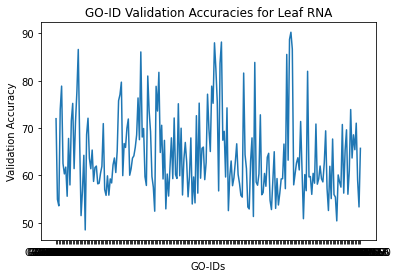

In [197]:
plt.plot(plot_x_values,Leaf_Go_Mean_Accuracy)

plt.xlabel('GO-IDs')

plt.ylabel('Validation Accuracy')

plt.title('GO-ID Validation Accuracies for Leaf RNA')

plt.show()

# Testing with BalancedRandomForestClassifier 

In [198]:
from imblearn.ensemble import BalancedRandomForestClassifier 
model1 = BalancedRandomForestClassifier(n_estimators = 50,
                                            max_depth=7,
                                            min_samples_split = 3,
                                            bootstrap= True,
                                            min_samples_leaf=1,random_state=202020)

Test_Leaf_Go_Mean_Accuracy=[]

for i in range(len(coulmns_to_normalize),len(data.columns)):
    X=data[coulmns_to_normalize]
    y=data.iloc[:,i]
    
    Random_forest_result = cross_validation(model1, X, y, 10)
    Test_Leaf_Go_Mean_Accuracy.append(Random_forest_result["Mean Validation Accuracy"])

In [199]:
Test_Leaf_Go_Mean_Accuracy

[68.17661395252733,
 46.131995840563945,
 59.05159841827638,
 74.13889716550453,
 76.37161259749146,
 65.87489650071345,
 59.28095882637424,
 60.41012855622052,
 54.65993278722643,
 68.18525324197947,
 61.738430539064716,
 68.99007342647396,
 68.63114800734863,
 58.29015435430669,
 69.86839494878564,
 79.1709688431587,
 90.02677693115069,
 66.58847448415057,
 56.6805289580897,
 53.50034774263002,
 72.87542541388486,
 49.848494263182396,
 70.339990477317,
 62.38756571175317,
 62.335703772689364,
 64.70674328733199,
 58.367921060551375,
 49.208445691509986,
 50.37222311227033,
 53.05475804749064,
 55.74616060693629,
 56.20900080703242,
 59.839111949919065,
 58.130043016774,
 78.85064884507523,
 61.14998936933187,
 50.44135052906291,
 58.83959332453932,
 47.82364769666362,
 71.0755484900708,
 60.46219637089951,
 62.63836338618223,
 60.56163054984511,
 61.21911865772094,
 66.85291609707747,
 77.91190470130067,
 78.15430077903333,
 81.55501221029559,
 59.9818324127574,
 69.11994163613468,
 

# Single_Cell_root_22_cluster:

In [200]:
single_cell_data = pd.read_csv('data/cluster_go_matrix-2.txt')

In [201]:
single_cell_data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,GO:0071456,GO:0071555,GO:0071704,GO:0090305,GO:0090502,GO:0098869,GO:0099503,GO:0106310,GO:0110165,GO:1902600
0,AT1G01010,0.480890,0.708263,0.110234,0.049439,0.920825,0.236548,1.349233,0.348183,0.025614,...,0,0,0,0,0,0,0,0,0,0
1,AT1G01020,0.227672,0.264158,0.394339,0.304410,0.242553,0.827590,0.210959,0.312529,0.152758,...,0,0,0,0,0,0,0,0,0,0
2,AT1G01030,0.185133,0.005973,0.003986,0.048651,0.013937,0.001099,0.025802,0.150170,0.000867,...,0,0,0,0,0,0,0,0,0,0
3,AT1G01040,0.095558,0.099387,0.019670,0.049202,0.106264,0.021753,0.083777,0.108675,0.008440,...,0,0,0,1,1,0,0,0,0,0
4,AT1G01050,0.833787,2.852744,2.542520,2.680850,1.877681,0.949841,1.543895,0.629689,1.235073,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27411,ATCG01250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
27412,ATCG01270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
27413,ATCG01280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
27414,ATCG01300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [202]:
single_cell_data.columns = single_cell_data.columns.str.replace('Unnamed: 0','GeneID')
single_cell_data.index=single_cell_data.iloc[:,0]
single_cell_data.drop(columns=single_cell_data.columns[0], axis=1, inplace=True)

In [203]:
single_cell_data

,1,2,3,4,5,6,7,8,9,10,...,GO:0071456,GO:0071555,GO:0071704,GO:0090305,GO:0090502,GO:0098869,GO:0099503,GO:0106310,GO:0110165,GO:1902600
GeneID,,,,,,,,,,,,,,,,,,,,,
AT1G01010,0.480890,0.708263,0.110234,0.049439,0.920825,0.236548,1.349233,0.348183,0.025614,0.216047,...,0,0,0,0,0,0,0,0,0,0
AT1G01020,0.227672,0.264158,0.394339,0.304410,0.242553,0.827590,0.210959,0.312529,0.152758,0.468306,...,0,0,0,0,0,0,0,0,0,0
AT1G01030,0.185133,0.005973,0.003986,0.048651,0.013937,0.001099,0.025802,0.150170,0.000867,0.002530,...,0,0,0,0,0,0,0,0,0,0
AT1G01040,0.095558,0.099387,0.019670,0.049202,0.106264,0.021753,0.083777,0.108675,0.008440,0.049053,...,0,0,0,1,1,0,0,0,0,0
AT1G01050,0.833787,2.852744,2.542520,2.680850,1.877681,0.949841,1.543895,0.629689,1.235073,0.218036,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
ATCG01270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
ATCG01280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [204]:
cols_to_norm = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]
single_cell_data[cols_to_norm] = single_cell_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

print("Scaled Dataset Using Pandas")
single_cell_data

Scaled Dataset Using Pandas


,1,2,3,4,5,6,7,8,9,10,...,GO:0071456,GO:0071555,GO:0071704,GO:0090305,GO:0090502,GO:0098869,GO:0099503,GO:0106310,GO:0110165,GO:1902600
GeneID,,,,,,,,,,,,,,,,,,,,,
AT1G01010,0.003197,0.008593,0.000952,0.000473,0.006437,0.003190,0.009818,0.002982,0.000125,0.001617,...,0,0,0,0,0,0,0,0,0,0
AT1G01020,0.001514,0.003205,0.003406,0.002914,0.001696,0.011162,0.001535,0.002677,0.000747,0.003505,...,0,0,0,0,0,0,0,0,0,0
AT1G01030,0.001231,0.000072,0.000034,0.000466,0.000097,0.000015,0.000188,0.001286,0.000004,0.000019,...,0,0,0,0,0,0,0,0,0,0
AT1G01040,0.000635,0.001206,0.000170,0.000471,0.000743,0.000293,0.000610,0.000931,0.000041,0.000367,...,0,0,0,1,1,0,0,0,0,0
AT1G01050,0.005543,0.034612,0.021960,0.025659,0.013126,0.012811,0.011235,0.005393,0.006037,0.001632,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
ATCG01270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
ATCG01280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [205]:
counts_1=[]
for i in range(len(cols_to_norm),len(single_cell_data.columns)):
    y=single_cell_data[single_cell_data.columns[i]]
    counter=Counter(y)
    if(counter[1]<100):
        cols_to_drop.append(single_cell_data.columns[i])
    else:
        counts_1.append(counter[1])

# counts_1
# cols_to_drop
single_cell_data.drop(cols_to_drop, axis=1, inplace=True)

In [206]:
# undersample = OneSidedSelection(n_neighbors=600, n_seeds_S=700)
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

RFModel = RandomForestClassifier(n_estimators=20, random_state=0)

Single_cell_Go_Mean_Accuracy=[]
Single_cell_Go_Std_Accuracy=[]
Single_cell_Go_10cross_Accuracies=[]

for i in range(len(cols_to_norm),len(single_cell_data.columns)):
    X=single_cell_data[cols_to_norm]
    y=single_cell_data.iloc[:,i]
    X_sample, y_sample = undersample.fit_resample(X, y)
    Random_forest_result = cross_validation(RFModel, X_sample, y_sample, 10)
    Single_cell_Go_Mean_Accuracy.append(Random_forest_result["Mean Validation Accuracy"])
    Single_cell_Go_Std_Accuracy.append(Random_forest_result["Std Validation Accuracy"])
    Single_cell_Go_10cross_Accuracies.append(Random_forest_result["Validation Accuracy scores"])

In [207]:
# X=single_cell_data[cols_to_norm]

plot_x_values=[]
for i in range(len(cols_to_norm),len(single_cell_data.columns)):
    plot_x_values.append(single_cell_data.columns[i])

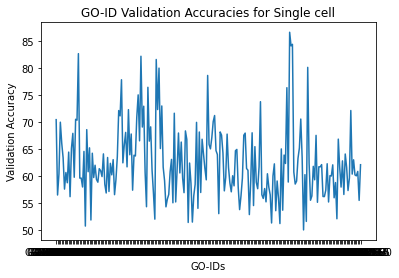

In [208]:
plt.plot(plot_x_values,Single_cell_Go_Mean_Accuracy)

plt.xlabel('GO-IDs')

plt.ylabel('Validation Accuracy')

plt.title('GO-ID Validation Accuracies for Single cell')

plt.show()


In [209]:
# Accuracies_Bulk_vs_Single=np.column_stack((plot_x_values,Bulk_Go_Mean_Accuracy,Single_cell_Go_Mean_Accuracy))
# Accuracies_Bulk_vs_Single
# Mean_Accuracies_Bulk_vs_Single = pd.DataFrame(Accuracies_Bulk_vs_Single, columns = ['GO_ID','Bulk_value','Single_value'])
# print(Mean_Accuracies_Bulk_vs_Single)

# Single_Cell_root_ 33 clusters:

In [16]:
single_cell_33_data = pd.read_csv('data/clusters_33_go_matrix.txt')

In [17]:
single_cell_33_data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,GO:0071456,GO:0071555,GO:0071704,GO:0090305,GO:0090502,GO:0098869,GO:0099503,GO:0106310,GO:0110165,GO:1902600
0,AT1G01010,0.235354,0.130453,1.088534,0.025614,0.276876,0.475183,0.590260,0.218156,0.606518,...,0,0,0,0,0,0,0,0,0,0
1,AT1G01020,0.825579,0.410447,0.261396,0.152758,0.163924,0.272320,0.258516,0.457860,0.321913,...,0,0,0,0,0,0,0,0,0,0
2,AT1G01030,0.001090,0.003155,0.015176,0.000867,0.275636,0.115203,0.008890,0.002562,0.055250,...,0,0,0,0,0,0,0,0,0,0
3,AT1G01040,0.022025,0.023524,0.100888,0.008440,0.090527,0.108768,0.104148,0.046074,0.076399,...,0,0,0,1,1,0,0,0,0,0
4,AT1G01050,0.958800,1.651358,2.126612,1.235073,1.609432,0.692831,3.054592,0.215002,0.714507,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27411,ATCG01250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
27412,ATCG01270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
27413,ATCG01280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
27414,ATCG01300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [18]:
single_cell_33_data.columns = single_cell_33_data.columns.str.replace('Unnamed: 0','GeneID')
single_cell_33_data.index=single_cell_33_data.iloc[:,0]
single_cell_33_data.drop(columns=single_cell_33_data.columns[0], axis=1, inplace=True)

In [19]:
single_cell_33_data

,1,2,3,4,5,6,7,8,9,10,...,GO:0071456,GO:0071555,GO:0071704,GO:0090305,GO:0090502,GO:0098869,GO:0099503,GO:0106310,GO:0110165,GO:1902600
GeneID,,,,,,,,,,,,,,,,,,,,,
AT1G01010,0.235354,0.130453,1.088534,0.025614,0.276876,0.475183,0.590260,0.218156,0.606518,0.063581,...,0,0,0,0,0,0,0,0,0,0
AT1G01020,0.825579,0.410447,0.261396,0.152758,0.163924,0.272320,0.258516,0.457860,0.321913,0.371860,...,0,0,0,0,0,0,0,0,0,0
AT1G01030,0.001090,0.003155,0.015176,0.000867,0.275636,0.115203,0.008890,0.002562,0.055250,0.003478,...,0,0,0,0,0,0,0,0,0,0
AT1G01040,0.022025,0.023524,0.100888,0.008440,0.090527,0.108768,0.104148,0.046074,0.076399,0.018313,...,0,0,0,1,1,0,0,0,0,0
AT1G01050,0.958800,1.651358,2.126612,1.235073,1.609432,0.692831,3.054592,0.215002,0.714507,5.115776,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
ATCG01270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
ATCG01280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [20]:
cols_to_norm = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33"]
single_cell_33_data[cols_to_norm] = single_cell_33_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

print("Scaled Dataset Using Pandas")
single_cell_33_data

Scaled Dataset Using Pandas


,1,2,3,4,5,6,7,8,9,10,...,GO:0071456,GO:0071555,GO:0071704,GO:0090305,GO:0090502,GO:0098869,GO:0099503,GO:0106310,GO:0110165,GO:1902600
GeneID,,,,,,,,,,,,,,,,,,,,,
AT1G01010,0.003176,0.001116,0.008223,0.000125,0.002479,0.003550,0.007106,0.001624,0.005076,0.001028,...,0,0,0,0,0,0,0,0,0,0
AT1G01020,0.011141,0.003510,0.001975,0.000747,0.001468,0.002035,0.003112,0.003408,0.002694,0.006013,...,0,0,0,0,0,0,0,0,0,0
AT1G01030,0.000015,0.000027,0.000115,0.000004,0.002468,0.000861,0.000107,0.000019,0.000462,0.000056,...,0,0,0,0,0,0,0,0,0,0
AT1G01040,0.000297,0.000201,0.000762,0.000041,0.000810,0.000813,0.001254,0.000343,0.000639,0.000296,...,0,0,0,1,1,0,0,0,0,0
AT1G01050,0.012939,0.014121,0.016064,0.006037,0.014409,0.005177,0.036775,0.001600,0.005980,0.082723,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
ATCG01270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
ATCG01280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [21]:
counts_1=[]
for i in range(len(cols_to_norm),len(single_cell_33_data.columns)):
    y=single_cell_33_data[single_cell_33_data.columns[i]]
    counter=Counter(y)
    if(counter[1]<100):
        cols_to_drop.append(single_cell_33_data.columns[i])
    else:
        counts_1.append(counter[1])

# counts_1
# cols_to_drop
single_cell_33_data.drop(cols_to_drop, axis=1, inplace=True)

In [22]:
# undersample = OneSidedSelection(n_neighbors=600, n_seeds_S=700)
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

RFModel = RandomForestClassifier(n_estimators=20, random_state=0)

Single_cell_33_Go_Mean_Accuracy=[]
Single_cell_33_Go_Std_Accuracy=[]
Single_cell_33_Go_10cross_Accuracies=[]
Single_cell_33_Go_10cross_Mean_F1=[]
Single_cell_33_Go_10cross_Mean_Precision=[]
Single_cell_33_Go_10cross_Mean_Recall=[]

for i in range(len(cols_to_norm),len(single_cell_33_data.columns)):
    X=single_cell_33_data[cols_to_norm]
    y=single_cell_33_data.iloc[:,i]
    # X_sample, y_sample = undersample.fit_resample(X, y)
    X_sample = X
    y_sample = y
    Random_forest_result = cross_validation(RFModel, X_sample, y_sample, 10)
    Single_cell_33_Go_Mean_Accuracy.append(Random_forest_result["Mean Validation Accuracy"])
    Single_cell_33_Go_Std_Accuracy.append(Random_forest_result["Std Validation Accuracy"])
    Single_cell_33_Go_10cross_Accuracies.append(Random_forest_result["Validation Accuracy scores"])
    Single_cell_33_Go_10cross_Mean_F1.append(Random_forest_result["Mean Validation F1 Score"])
    Single_cell_33_Go_10cross_Mean_Precision.append(Random_forest_result["Mean Validation Precision"])
    Single_cell_33_Go_10cross_Mean_Recall.append(Random_forest_result["Mean Validation Recall"])

In [35]:
Single_cell_33_Go_Mean_Accuracy

[69.91736694677871,
 56.36752240349728,
 54.91379310344827,
 71.40070921985816,
 73.11764705882354,
 66.8053849787435,
 61.788958770090844,
 58.3635300993571,
 58.064673896128724,
 65.08357135300963,
 56.092411432945696,
 65.99999999999999,
 65.57142857142858,
 59.85143935818782,
 72.81199724201332,
 71.89264985611861,
 85.02644725242433,
 68.96103896103895,
 59.22077922077922,
 55.33898305084746,
 63.41463414634146,
 54.81538461538461,
 67.75193798449612,
 66.50546448087431,
 61.55172413793103,
 57.036199095022624,
 64.35897435897436,
 60.17871379218709,
 58.3052558301427,
 59.897058823529406,
 58.91098484848485,
 57.535612535612536,
 57.1120218579235,
 59.40643863179075,
 70.6140350877193,
 59.11465892597968,
 57.6300894496572,
 58.6857142857143,
 56.93204261954262,
 58.66908650937689,
 62.13406547865728,
 63.65413314890983,
 60.35294117647059,
 59.336116042760544,
 64.47899159663865,
 75.3133903133903,
 70.90909090909092,
 74.39083557951483,
 61.16069547093329,
 65.76214896214896,
 

In [36]:
plot_x_values=[]
for i in range(len(cols_to_norm),len(single_cell_33_data.columns)):
    plot_x_values.append(single_cell_33_data.columns[i])

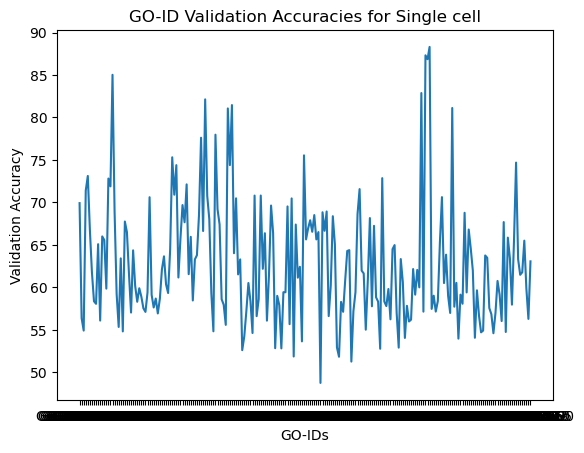

In [37]:
plt.plot(plot_x_values,Single_cell_33_Go_Mean_Accuracy)

plt.xlabel('GO-IDs')

plt.ylabel('Validation Accuracy')

plt.title('GO-ID Validation Accuracies for Single cell')

plt.show()

# Bulk Data

In [219]:
bulk_data = pd.read_csv('data/bulk_go_matrix.csv')

In [220]:
coulmns_to_normalize=bulk_data.columns[1:49]

In [221]:
bulk_data.describe()

,APL_1,APL_2,APL_3,CO2_1,CO2_2,CO2_3,COBL9_1,COBL9_2,COBL9_3,COR_1,...,GO:0071456,GO:0071555,GO:0071704,GO:0090305,GO:0090502,GO:0098869,GO:0099503,GO:0106310,GO:0110165,GO:1902600
count,27365.000000,27365.000000,27365.000000,27365.000000,27365.000000,27365.000000,27365.000000,27365.000000,27365.000000,27365.000000,...,27365.000000,27365.000000,27365.000000,27365.000000,27365.000000,27365.000000,27365.000000,27365.000000,27365.00000,27365.000000
mean,17.635210,19.073493,14.661183,15.647938,15.857274,14.960100,16.273833,16.958909,16.368645,16.538566,...,0.008734,0.014690,0.003837,0.007966,0.004129,0.005883,0.006103,0.022986,0.01279,0.004056
std,273.253781,648.925331,64.660758,77.063083,88.199561,67.985657,238.215333,340.365424,248.600431,337.030533,...,0.093047,0.120312,0.061826,0.088900,0.064128,0.076479,0.077882,0.149860,0.11237,0.063561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.116000,0.139000,0.174000,0.068000,0.045000,0.080000,0.076000,0.118000,0.083000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.094000,2.392000,2.627000,2.490000,2.430000,2.545000,1.435000,1.688000,1.484000,1.255000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,9.485000,10.011000,10.780000,10.555000,10.113000,10.641000,8.573000,8.793000,8.633000,8.305000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,40859.341000,105734.898000,5888.160000,6038.497000,6779.795000,4993.870000,34744.204000,51747.068000,38113.188000,53835.140000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [222]:
bulk_data[coulmns_to_normalize] = bulk_data[coulmns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [223]:
len(coulmns_to_normalize)

48

In [224]:
print("Scaled Dataset Using Pandas")
bulk_data

Scaled Dataset Using Pandas


,Unnamed: 0,APL_1,APL_2,APL_3,CO2_1,CO2_2,CO2_3,COBL9_1,COBL9_2,COBL9_3,...,GO:0071456,GO:0071555,GO:0071704,GO:0090305,GO:0090502,GO:0098869,GO:0099503,GO:0106310,GO:0110165,GO:1902600
0,AT4G04480,0.000000,0.000001,0.000011,0.000000,0.000024,0.000000,0.000003,0.000003,0.000002,...,0,0,0,0,0,0,0,0,0,0
1,AT1G32928,0.000211,0.000037,0.001038,0.000739,0.000664,0.001071,0.000156,0.000055,0.000172,...,1,0,0,0,0,0,0,0,0,0
2,AT1G07730,0.000138,0.000199,0.002008,0.000571,0.000340,0.000848,0.000524,0.000301,0.000290,...,0,0,0,0,0,0,0,0,0,0
3,AT1G03340,0.000000,0.000001,0.000016,0.000043,0.000012,0.000040,0.000000,0.000003,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,AT1G04440,0.001914,0.000695,0.010839,0.005025,0.003893,0.006251,0.001202,0.000717,0.001155,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27360,AT1G48210,0.001119,0.000460,0.005205,0.000357,0.000888,0.001508,0.000370,0.000202,0.000369,...,0,0,0,0,0,0,0,0,0,0
27361,AT4G13170,0.000281,0.000058,0.002758,0.011831,0.011067,0.012901,0.000220,0.000180,0.000204,...,0,0,0,0,0,0,0,0,0,0
27362,AT5G18320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,0.000001,0.000006,0.000003,...,0,0,0,0,0,0,0,0,0,0
27363,AT2G10602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [225]:
bulk_data.set_index('Unnamed: 0')
bulk_data.rename( columns={'Unnamed: 0':'GeneID'}, inplace=True )
bulk_data=bulk_data.set_index('GeneID')

In [226]:
bulk_data.drop(cols_to_drop, axis=1, inplace=True)

In [227]:
# undersample = OneSidedSelection(n_neighbors=600, n_seeds_S=700)
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

RFModel = RandomForestClassifier(n_estimators=20, random_state=0)

Bulk_Go_Mean_Accuracy=[]
Bulk_Go_Std_Accuracy=[]
Bulk_Go_10cross_Accuracies=[]

for i in range(len(coulmns_to_normalize),len(bulk_data.columns)):
    X=bulk_data[coulmns_to_normalize]
    y=bulk_data.iloc[:,i]
    X_sample, y_sample = undersample.fit_resample(X, y)
    Random_forest_result = cross_validation(RFModel, X_sample, y_sample, 10)
    Bulk_Go_Mean_Accuracy.append(Random_forest_result["Mean Validation Accuracy"])
    Bulk_Go_Std_Accuracy.append(Random_forest_result["Std Validation Accuracy"])
    Bulk_Go_10cross_Accuracies.append(Random_forest_result["Validation Accuracy scores"])

In [228]:
plot_x_values=[]
for i in range(len(coulmns_to_normalize),len(bulk_data.columns)):
    plot_x_values.append(bulk_data.columns[i])

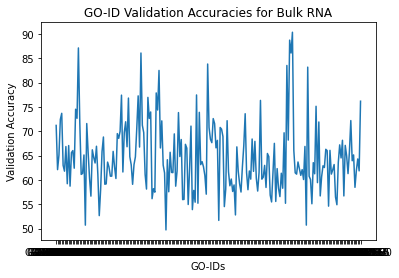

In [229]:
plt.plot(plot_x_values,Bulk_Go_Mean_Accuracy)

plt.xlabel('GO-IDs')

plt.ylabel('Validation Accuracy')

plt.title('GO-ID Validation Accuracies for Bulk RNA')

plt.show()

# 10/10/2022:

# Adding Go functionality to table:

In [230]:
# 1) GO term

In [231]:
# Import the OBO parser from GOATools
from goatools import obo_parser
import wget
import os

In [232]:
go_obo_url = 'http://purl.obolibrary.org/obo/go/go-basic.obo'
data_folder = os.getcwd() + '/data'

# Check if we have the ./data directory already
if(not os.path.isfile(data_folder)):
    # Emulate mkdir -p (no error if folder exists)
    try:
        os.mkdir(data_folder)
    except OSError as e:
        if(e.errno != 17):
            raise e
else:
    raise Exception('Data path (' + data_folder + ') exists as a file. '
                   'Please rename, remove or change the desired location of the data path.')

# Check if the file exists already
if(not os.path.isfile(data_folder+'/go-basic.obo')):
    go_obo = wget.download(go_obo_url, data_folder+'/go-basic.obo')
else:
    go_obo = data_folder+'/go-basic.obo'

In [233]:
go = obo_parser.GODag(go_obo)

/Users/sai/Desktop/sai_go_analysis_2022/data/go-basic.obo: fmt(1.2) rel(2022-10-07) 46,824 Terms


In [234]:
go_id = 'GO:0048527'
go_term = go[go_id]
print(go_term.name)

lateral root development


In [235]:
GO_Names=[]
for i in range(len(plot_x_values)):
    if(plot_x_values[i]=='GO:0031225' or plot_x_values[i]=='GO:0046658'):
        GO_Names.append('Obsoleted protein topology')
        continue
    GO_Names.append(go[plot_x_values[i]].name)

In [236]:
 GO_Names

['Golgi membrane',
 'nucleotide binding',
 'magnesium ion binding',
 'plant-type vacuole',
 'mRNA splicing, via spliceosome',
 'transcription cis-regulatory region binding',
 'RNA polymerase II cis-regulatory region sequence-specific DNA binding',
 'DNA-binding transcription factor activity, RNA polymerase II-specific',
 'molecular_function',
 'nucleic acid binding',
 'DNA binding',
 'chromatin binding',
 'double-stranded DNA binding',
 'DNA-binding transcription factor activity',
 'RNA binding',
 'mRNA binding',
 'structural constituent of ribosome',
 'translation initiation factor activity',
 'actin binding',
 'catalytic activity',
 'GTPase activity',
 'serine-type endopeptidase activity',
 'helicase activity',
 'monooxygenase activity',
 'nuclease activity',
 'hydrolase activity, hydrolyzing O-glycosyl compounds',
 'peroxidase activity',
 'protein kinase activity',
 'protein serine/threonine kinase activity',
 'protein serine/threonine/tyrosine kinase activity',
 'phosphoprotein pho

In [237]:
# Wilcoxon Test Scores:

In [238]:
wilcoxon_scores=[]
for i in range(len(Single_cell_Go_10cross_Accuracies)):
    wilcoxon_scores.append(stats.wilcoxon(Single_cell_Go_10cross_Accuracies[i],Leaf_Go_10cross_Accuracies[i]).pvalue)

In [239]:
wilcoxon_scores

[0.625,
 0.10546875,
 0.193359375,
 0.01953125,
 0.00390625,
 0.76953125,
 0.4921875,
 0.6953125,
 0.00390625,
 0.064453125,
 0.193359375,
 0.322265625,
 0.027281171477617997,
 0.375,
 0.76953125,
 0.00390625,
 0.037109375,
 0.193359375,
 0.193359375,
 0.625,
 0.845703125,
 0.625,
 1.0,
 0.001953125,
 0.4921875,
 0.00390625,
 0.921875,
 0.921875,
 0.4921875,
 0.130859375,
 0.921875,
 0.6784023758521882,
 0.4921875,
 0.375,
 0.037109375,
 0.921875,
 0.083984375,
 0.01953125,
 0.193359375,
 0.4921875,
 0.76953125,
 0.6953125,
 0.02734375,
 0.01953125,
 0.76953125,
 0.431640625,
 0.083984375,
 0.322265625,
 0.009765625,
 0.275390625,
 0.5131877489580465,
 0.013671875,
 0.76953125,
 0.16015625,
 0.02734375,
 0.02734375,
 0.76953125,
 0.193359375,
 0.10546875,
 0.6953125,
 0.6953125,
 0.193359375,
 0.845703125,
 0.4921875,
 0.322265625,
 0.130859375,
 0.19212716862511903,
 0.048828125,
 1.0,
 0.6953125,
 0.4921875,
 0.76953125,
 0.10546875,
 0.6953125,
 0.625,
 1.0,
 0.921875,
 0.322265625,

In [240]:
wilcoxon_scores_22vs33_root=[]
for i in range(len(Single_cell_Go_10cross_Accuracies)):
    wilcoxon_scores_22vs33_root.append(stats.wilcoxon(Single_cell_Go_10cross_Accuracies[i],Single_cell_33_Go_10cross_Accuracies[i]).pvalue)

In [241]:
Accuracies_Leaf_vs_Single=np.column_stack((plot_x_values, GO_Names, Leaf_Go_Mean_Accuracy, Single_cell_Go_Mean_Accuracy, Leaf_Go_Std_Accuracy, Single_cell_Go_Std_Accuracy, Bulk_Go_Mean_Accuracy, Bulk_Go_Std_Accuracy, Single_cell_33_Go_Mean_Accuracy, Single_cell_33_Go_Std_Accuracy, wilcoxon_scores, wilcoxon_scores_22vs33_root))

In [242]:
Accuracies_Leaf_vs_Single

array([['GO:0000139', 'Golgi membrane', '71.98207464002351', ...,
        '6.401011482783835', '0.625', '0.7220491421508173'],
       ['GO:0000166', 'nucleotide binding', '54.925053533190585', ...,
        '2.3318057112100585', '0.10546875', '0.845703125'],
       ['GO:0000287', 'magnesium ion binding', '53.56923076923076', ...,
        '9.450588384380515', '0.193359375', '0.06297905121445523'],
       ...,
       ['GO:0106310', 'protein serine kinase activity',
        '58.97619047619048', ..., '3.9788190933110132', '0.556640625',
        '0.232421875'],
       ['GO:0110165', 'cellular anatomical entity', '53.33333333333332',
        ..., '7.5916172889065265', '0.375', '0.721814730439508'],
       ['GO:1902600', 'proton transmembrane transport',
        '65.71428571428571', ..., '11.177614730707578', '0.232421875',
        '0.2924355944685362']], dtype='<U101')

In [243]:
Final_Accuracies_Leaf_vs_Single = pd.DataFrame(Accuracies_Leaf_vs_Single, columns = ['GO_ID','GO_term_Name','Leaf_Mean_value','Single_Mean_value','Leaf_Std_value','Single_std_value', 'Bulk_Mean_value', 'Bulk_Std_values', 'Single_33_Mean_value', 'Single_33_std_value', 'Wilcoxon_P_Value', 'Wilcoxon_P_33vs22_root'])

print(Final_Accuracies_Leaf_vs_Single)

          GO_ID                     GO_term_Name     Leaf_Mean_value  \
0    GO:0000139                   Golgi membrane   71.98207464002351   
1    GO:0000166               nucleotide binding  54.925053533190585   
2    GO:0000287            magnesium ion binding   53.56923076923076   
3    GO:0000325               plant-type vacuole   73.87919179096582   
4    GO:0000398   mRNA splicing, via spliceosome   78.86809269162211   
..          ...                              ...                 ...   
215  GO:0098869  cellular oxidant detoxification   65.42328042328042   
216  GO:0099503                secretory vesicle   71.03386809269163   
217  GO:0106310   protein serine kinase activity   58.97619047619048   
218  GO:0110165       cellular anatomical entity   53.33333333333332   
219  GO:1902600   proton transmembrane transport   65.71428571428571   

      Single_Mean_value      Leaf_Std_value    Single_std_value  \
0     70.51120448179272   4.192054305658437   6.239134251535188   
1

In [244]:
# Final_Accuracies_Leaf_vs_Single.to_csv("Accuracy_Table_Leaf_vs_Single_11_08_22.csv")

In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
from statsmodels.formula.api import ols
from numpy import mean
from numpy import std
from pandas import read_csv

from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB #generative and supervised
from sklearn.neighbors import KNeighborsClassifier #discriminative and supervised
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #discriminative and supervised
from sklearn.neural_network import MLPClassifier #discriminative and supervised
from sklearn.ensemble import RandomForestClassifier #discriminative and supervised
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.svm #Support Vector Machine
from sklearn.svm import SVC #discriminative and supervised
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix # calcuate confusion matrix
from sklearn.model_selection import KFold # for five fold cross validation
from statannotations.Annotator import Annotator

In [247]:
def get_models():
    models = []
    models.append(('NB', GaussianNB()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('MLPNN', MLPClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('SVML', SVC(kernel='linear')))
    models.append(('SVMR', SVC(kernel='rbf')))
    models.append(('GBoost', GradientBoostingClassifier()))
    #models.append(('XGBoost', XGBClassifier()))
    return models

# Evaluate the above models using repeated kfold-cross-validation, which estimates the model accurary/performance based on running k-fold a number of times and calculating the performance across all the repeats. Suited to datasets of smaller scale
def evaluate_models(models,features, labels):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(models, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [ ]:
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

models = get_models()
RFModel = RandomForestClassifier(n_estimators=20, random_state=0)

Model_Accuracy=dict()


for i in range(len(cols_to_norm),len(single_cell_33_data.columns)):
    X=single_cell_33_data[cols_to_norm]
    y=single_cell_33_data.iloc[:,i]
    X_sample, y_sample = undersample.fit_resample(X, y)
    results = [] 
    names = []
    model_mean_accuracy=[]
    for name, model in models:
        accuracy = evaluate_models(model, X_sample, y_sample)
        results.append(accuracy)
        names.append(name)
        model_mean_accuracy.append(mean(accuracy))
    Model_Accuracy[single_cell_33_data.columns[i]]=model_mean_accuracy
        
Model_Accuracy

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer

In [ ]:
Model_Accuracy

In [ ]:
Model_Accuracy_Matrix = np.array([Model_Accuracy[i] for i in plot_x_values])

Model_Accuracy_Matrix

In [ ]:
modelNames = []

for name, model in models:
        modelNames.append(name)
        
Model_Accuracy_DF = pd.DataFrame(Model_Accuracy_Matrix,
                 index=plot_x_values,
                 columns=modelNames)
Model_Accuracy_DF
